# Implement KMeans from scratch

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
datafile = '/Users/flint/Data/milan/Airbnb_Milan.csv'
conv = {
    'review_scores_rating': lambda x: int(x) / 10,
    'review_scores_accuracy': lambda x: int(x) / 10,
    'review_scores_cleanliness': lambda x: int(x) / 10,
    'review_scores_checkin': lambda x: int(x) / 10,
    'review_scores_communication': lambda x: int(x) / 10,
    'review_scores_location': lambda x: int(x) / 10,
    'review_scores_value': lambda x: int(x) / 10,
}
milan = pd.read_csv(datafile, index_col=0, converters=conv)

## Clustering by daily price and review_scores_rating

In [7]:
import matplotlib.pyplot as plt

In [8]:
X = milan[['daily_price', 'review_scores_rating']]

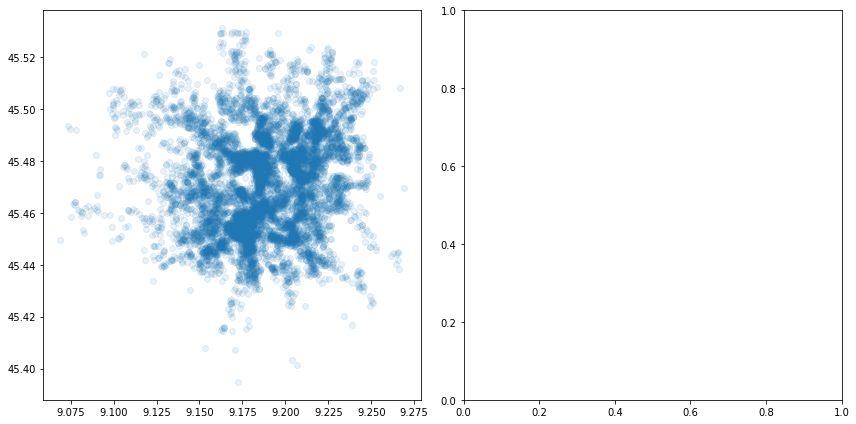

In [10]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
ax[0].scatter(milan.longitude, milan.latitude, 
              alpha=0.1)
plt.tight_layout()
plt.show()